Carles Falcó i Gandia

Perm Number: 7621931

falcoigandia@ucsb.edu

#### 1. Review of some theorems of Calculus
##### The Intermediate Value Theorem
Let $f$ be a continous function on $[a,b]$. If $\min(f(a),f(b))<c<\max(f(a),f(b))$ then there exists at least one $x\in[a,b]$ such that $f(x)=c$.

##### The Mean Value Theorem
Let $f$ be a continous function on $[a,b]$ and differentiable on $(a,b)$. Then there exists $c\in(a,b)$ such that $f'(c)=\frac{f(b)-f(a)}{b-a}$.

##### Rolle's Theorem
Let $f$ be a continous function on $[a,b]$ and differentiable on $(a,b)$. If $f(a)=f(b)$ then there exists $c\in (a,b)$ such that $f'(c)=0$.

##### The Mean Value Theorem for Integrals and The Weighted Mean Value Theorem for Integrals
Let $f$ be a continous function on $[a,b]$. Then there exists $c\in(a,b)$ such that $\int_a^b f(x)dx=f(c)(b-a)$.
More generally ig $g$ is an integrable function on $[a,b]$ that does not change sign in $(a,b)$ there exists $c\in [a,b]$ such that $\int_a^b f(x)g(x)dx=f(c)\int_a^b g(x)dx$.

#### 2. Implementing the Composite Trapezoidal Rule quadrature
We will define a function capable of computing $T_h[f]=h\big[\frac{1}{2}f(x_0)+f(x_1)+\ldots+f(x_{N-1})+\frac{1}{2}f(x_N)\big]$ given $x_0=a$, $x_N=b$ and $h=\frac{b-a}{N}$. The name of the variables will be the same as usual.

In [284]:
import numpy as np
import matplotlib.pyplot as plt
def thf(f,a,b,h): #parameters are the desired function and a,b and h
    N = int( (b-a)/h )
    return h*( 1/2*f(a) + 1/2*f(b) + sum( [ f(a + k*h) for k in range(1,N) ] ) )

(a) Now we take $f(x)=\frac{1}{(1+x)^2}$ on the interval $[0,2]$ and we compute the error $|I[f]-T_h[f]|$ with $I[f]=\int_0^2 f(x)dx$. First we observe that $$\int_0^2\frac{1}{(1+x)^2} dx =\bigg[-\frac{1}{1+x}\bigg]_0^2=\frac{2}{3}$$

For $h=\frac{2}{20}$, the error is:

In [285]:
e1 = np.abs( 2/3 - thf(lambda x: 1/(1+x)**2,0,2,2/20) )
print('e1 =',e1)

e1 = 0.00160164212835


For $h=\frac{2}{40}$, the error is:

In [286]:
e2 = np.abs( 2/3 - thf(lambda x: 1/(1+x)**2,0,2,2/40) )
print('e2 =',e2)

e2 = 0.000401027462466


For $h=\frac{2}{80}$, the error is:

In [287]:
e3 = np.abs( 2/3 - thf(lambda x: 1/(1+x)**2,0,2,2/80) )
print('e3 =',e3)

e3 = 0.000100295680531


Taking $h=\frac{2}{20}$ we observe that making $h$ twice smaller the error becomes around $2^2=4$ times smaller. If we make $h$ 4 times smaller we see that the error becomes around $4^2=16$ times smaller, confirming the expected quadratic convergence rate. We can see this in the following plot. This makes sense because $f$ is $C^2[0,2]$ since $f''(x)=\frac{6}{(1+x)^4}$ and it is continous in the mentioned interval.

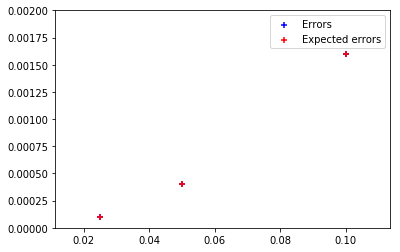

In [288]:
#We compare the actual errors with the ones we expected from the first error.
errors = [e1,e2,e3]
experrors = [e1,e1/4,e1/16]
hs = [2/20,2/40,2/80]
plt.scatter(hs,errors,color='blue',label='Errors',marker='+')
plt.scatter(hs,experrors,color='red',label='Expected errors',marker='+')
plt.ylim(0,0.002)
plt.legend()
plt.show()
#Actually the expected ones and the real ones overlap in the plot

(b) Now we take $f(x)=\sqrt{x}$ in $[0,1]$ and we compute $T_{1/N}[f]$ for $N=16,32,64,128$. In this case $\int_0^1\sqrt{x}dx=\frac{2}{3}$ too.

In [289]:
#We print the result of thf next to the error we make
#N=16
er1 = np.abs( 2/3 - thf(lambda x: np.sqrt(x),0,1,1/16) )
print( 'Th(f) =', thf(lambda x: np.sqrt(x),0,1,1/16), 'er1 =', er1 )

Th(f) = 0.663581196877 er1 = 0.00308546978944


In [290]:
#N=32
er2 = np.abs( 2/3 - thf(lambda x: np.sqrt(x),0,1,1/32) )
print( 'Th(f) =', thf(lambda x: np.sqrt(x),0,1,1/32), 'er2 =', er2 )

Th(f) = 0.665558936279 er2 = 0.00110773038772


In [291]:
#N=64
er3 = np.abs( 2/3 - thf(lambda x: np.sqrt(x),0,1,1/64) )
print( 'Th(f) =', thf(lambda x: np.sqrt(x),0,1,1/64), 'er3 =', er3 )

Th(f) = 0.666270811379 er3 = 0.00039585528816


In [292]:
#N=128
er4 = np.abs( 2/3 - thf(lambda x: np.sqrt(x),0,1,1/128) )
print( 'Th(f) =', thf(lambda x: np.sqrt(x),0,1,1/128), 'er4 =', er4 )

Th(f) = 0.666525657297 er4 = 0.00014100936984


In [293]:
#The errors with a quadratic convergence rate would be
print('er1 =',er1,'er2 =',er1/2**2,'er3 =',er1/4**2,'er4 =',er1/8**2)

er1 = 0.00308546978944 er2 = 0.00077136744736 er3 = 0.00019284186184 er4 = 4.821046546e-05


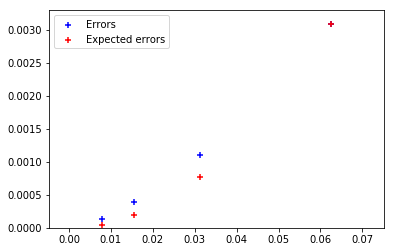

In [294]:
#If we compare them
errors2 = [er1,er2,er3,er4]
experrors2 = [er1,er1/2**2,er1/4**2,er1/8**2]
hs2 = [1/16,1/32,1/64,1/128]
plt.scatter(hs2,errors2,color='blue',label='Errors',marker='+')
plt.scatter(hs2,experrors2,color='red',label='Expected errors',marker='+')
plt.ylim(0,0.0033)
plt.legend()
plt.show()

In this case we don't see the quadratic convergence rate. That can be explained taking into account the continuity of the second derivative of the integrand. We see that $f''(x)=\frac{-1}{4x^{3/2}}$ which tend asymptotically to $-\infty$ as $x$ approaches to 0. Hence $f$ is not $C^2[0,1]$ and we cannot conclude that the error is $O(h^2)$ as in the previous case.

#### 3.

We consider now $$I[\cos x^2]=\int_0^{\sqrt{\pi/2}} \cos x^2 dx$$

In [295]:
#We'll fix now 
aa = 0
bb = np.sqrt(np.pi/2)
#We'll keep on using the function thf as in the previous exercise

We compute $$ q(h)=\frac{T_{h/2}[\cos x^2]-T_{h}[\cos x^2]}{T_{h/4}[\cos x^2]-T_{h/2}[\cos x^2]} $$ defining a function too

In [296]:
def q(H):
    x1 = thf(lambda x: np.cos(x**2),aa,bb,H/2)
    x2 = thf(lambda x: np.cos(x**2),aa,bb,H)
    x3 = thf(lambda x: np.cos(x**2),aa,bb,H/4)
    return (x1-x2)/(x3-x1)

(a) And we find a value of $h$ for which $q(h)\approx 4$. We'll consider that $q(h)\approx 4$ if $|q(h)-4|<10^{-6}$

In [297]:
#We define
tol = 1e-6
#Now we find a proper value of h
n=1
while(np.abs( q(bb/n)-4 ) > tol and n<1000):
    n = n + 20

In [298]:
#We find an n of b
print('n =',n)
#Such that our h is
hh = bb/n
print('h =',hh)
#And moreover q(h) is
print('q(h) =',q(hh))

n = 821
h = 0.00152657020379
q(h) = 4.00000077118


(b) Now, we'll make an estimation of the error we commit with this $h$. We'll use the fact that for small enough $h$ and if the integrand is $C^2[0,\sqrt{\pi/2}]$, which is obvious in this case, the error is $$E_h[\cos x^2]\approx\frac{4}{3}\big[T_{h/2}[\cos x^2]-T_{h}[\cos x^2]\big]$$

In [299]:
#computing...
X1 = thf(lambda x: np.cos(x**2),aa,bb,hh/2)
X2 = thf(lambda x: np.cos(x**2),aa,bb,hh)
error2 = 4/3*(X1-X2)
print('error =',error2)

error = 4.86790820098e-07


(c) Now we'll use this error to calculate the extrapolated approximation:
$$ S_h[\cos x^2] = T_h[\cos x^2]+\frac{4}{3}\big[T_{h/2}[\cos x^2]-T_{h}[\cos x^2]\big]$$

In [300]:
#just computing...
sh = thf(lambda x: np.cos(x**2),aa,bb,hh) + error2
print('Sh(f) =',sh)
#in comparision to the thf value
print('Th(f) =',thf(lambda x: np.cos(x**2),aa,bb,hh))

Sh(f) = 0.977451424291
Th(f) = 0.977450937501


(d) The difference between the approximation $T_h[f]$ and the extrapolated approximation $S_h[f]$ lies in the error term of each one. We know that $$I[f]=T_h[f]+E_h[f]$$ and we've seen that $$E_h[f]\approx\frac{4}{3}\big[T_{h/2}[f]-T_{h}[f]\big]$$
But actually by doing this we are omitting a term $R(h)$ such that the real error is
$$E_h[f]\approx\frac{4}{3}\big[T_{h/2}[f]-T_{h}[f]\big]+R(h)$$
Precisely the fact that $R(h)=O(h^4)$ is what explains the faster convergence of $S_h[f]$, in other words, the error of $T_h[f]$ "goes" as $h^2$ while the error of $S_h[f]$ "goes" as $h^4$.